In [1]:
import pandas as pd
import numpy as np
import gc
import time
from contextlib import contextmanager

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import xgboost as xgb



import numpy as np
import pickle
import pandas as pd

from pydantic import BaseModel

import lime
from lime import lime_tabular
import matplotlib.pyplot as plt
import json
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE, ADASYN

import shap

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
import lime
from lime import lime_tabular

C:\Users\steph\anaconda3\envs\new_env_p8_v2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import Fonctions_P7 as fct_model

In [3]:
application_test = pd.read_csv("application_test.csv", sep = ',')
application_train = pd.read_csv("application_train.csv", sep = ',')
bureau = pd.read_csv("bureau.csv", sep = ',')
bureau_balance = pd.read_csv("bureau_balance.csv", sep = ',')
credit_card_balance = pd.read_csv("credit_card_balance.csv", sep = ',')
HomeCredit_columns_description = pd.read_csv("HomeCredit_columns_description.csv", sep = ',')
installments_payments = pd.read_csv("installments_payments.csv", sep = ',')
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv", sep = ',')
previous_application = pd.read_csv("previous_application.csv", sep = ',')
sample_submission = pd.read_csv("sample_submission.csv", sep = ',')


In [4]:
pd.options.display.max_columns = None

In [5]:
application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

# Etude application_train

In [6]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
print(application_train['TARGET'].value_counts(normalize = True))

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


In [8]:
print(application_train['CODE_GENDER'].value_counts())
print(pd.crosstab(application_train['CODE_GENDER'], application_train['TARGET'] , normalize = 'index'))

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
TARGET              0         1
CODE_GENDER                    
F            0.930007  0.069993
M            0.898581  0.101419
XNA          1.000000  0.000000


In [9]:
print(application_train['FLAG_OWN_CAR'].value_counts())
print(pd.crosstab(application_train['FLAG_OWN_CAR'],application_train['TARGET'], normalize = 'index' ))

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
TARGET               0         1
FLAG_OWN_CAR                    
N             0.914998  0.085002
Y             0.927563  0.072437


In [10]:
print(application_train['FLAG_OWN_REALTY'].value_counts())
print(pd.crosstab(application_train['FLAG_OWN_REALTY'],application_train['TARGET'], normalize = 'index' ))

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
TARGET                  0         1
FLAG_OWN_REALTY                    
N                0.916751  0.083249
Y                0.920384  0.079616


In [11]:
print(application_train['NAME_HOUSING_TYPE'].value_counts())
print(pd.crosstab(application_train['NAME_HOUSING_TYPE'],application_train['TARGET'] , normalize = 'index'))

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
TARGET                      0         1
NAME_HOUSING_TYPE                      
Co-op apartment      0.920677  0.079323
House / apartment    0.922043  0.077957
Municipal apartment  0.914603  0.085397
Office apartment     0.934276  0.065724
Rented apartment     0.876869  0.123131
With parents         0.883019  0.116981


In [12]:
print(application_train['OCCUPATION_TYPE'].value_counts())
print(pd.crosstab(application_train['OCCUPATION_TYPE'],application_train['TARGET'], normalize = 'index' ))

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
TARGET                        0         1
OCCUPATION_TYPE                          
Accountants            0.951697  0.048303
Cleaning staff         0.903933  0.096067
Cooking staff          0.895560  0.104440
Core staff             0.936960  0.063040
Drivers                0.886739  0.113261
HR staff               0.936057  0.063943
High skill tech staff  0.938401  0.061599
IT staff               0.935

## Autres datasets

In [14]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [15]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [16]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [17]:
HomeCredit_columns_description.head()

Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [18]:
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [19]:
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [20]:
sample_submission.head()

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [21]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Etude du preprocessing

In [22]:
with pd.option_context('display.max_rows', None) :
    print((application_train.isnull().sum()).sort_values())

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [23]:
# Pb days employed sur le max

print(application_train['DAYS_EMPLOYED'][application_train['DAYS_EMPLOYED'] == 365243 ].count())
print(application_train['DAYS_EMPLOYED'][application_train['DAYS_EMPLOYED'] >0].count())

55374
55374


In [24]:
application_train.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn").bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

In [25]:
application_train.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn").bar(subset = ["freq"], color ="crimson").bar(subset = ["unique"], color ="orange").bar(subset = ["count"], color ="pink")

# Creation de la base de modélisation

In [26]:
app_train = fct_model.application_train()

Train samples: 307511
                               count  percentage
SK_ID_CURR                         0        0.00
HOUR_APPR_PROCESS_START            0        0.00
REG_REGION_NOT_WORK_REGION         0        0.00
LIVE_REGION_NOT_WORK_REGION        0        0.00
REG_CITY_NOT_LIVE_CITY             0        0.00
REG_CITY_NOT_WORK_CITY             0        0.00
LIVE_CITY_NOT_WORK_CITY            0        0.00
ORGANIZATION_TYPE                  0        0.00
FLAG_DOCUMENT_21                   0        0.00
FLAG_DOCUMENT_20                   0        0.00
FLAG_DOCUMENT_19                   0        0.00
FLAG_DOCUMENT_18                   0        0.00
FLAG_DOCUMENT_17                   0        0.00
FLAG_DOCUMENT_16                   0        0.00
WEEKDAY_APPR_PROCESS_START         0        0.00
FLAG_DOCUMENT_15                   0        0.00
FLAG_DOCUMENT_13                   0        0.00
FLAG_DOCUMENT_12                   0        0.00
FLAG_DOCUMENT_11                   0        0.0

In [108]:
print(app_train.shape)

(307507, 212)


## Valeurs Manquantes

In [27]:
# corralation avec la cible
#np.abs(app_train.corr()['TARGET']).sort_values(ascending = False).iloc[:30]

In [28]:
#import matplotlib.pyplot as plt
#for var in data.columns :
#    sns.lineplot(data = data, x = var, hue = 'TARGET')
#    
#    plt.show()

In [29]:
app_train.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn").bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

In [30]:
%matplotlib inline

# Test Modélisation

## Creation Base train et test

In [31]:
Variables = [f for f in app_train.columns if f not in ['SK_ID_CURR', 'index']]
data=app_train[Variables]

# classification déséquilibrée donc utilisation d'une stratification aléatoire afin d'avoir un nombre 
#d'individus de chaque classe nécessaie dans chaque dataset
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, random_state = 0) 

X, y = data.drop(['TARGET'], axis = 1), data['TARGET']
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#test_data = app_train_test[app_train_test['TARGET'].isna()][Variables]

In [187]:
print(X_test.shape)

(76877, 210)


## SMOTE

In [32]:
X_resampled, y_resampled = SMOTE(random_state = 0).fit_resample(X_train, y_train)

## Comparaison différents types de modèles avec/ sans SMOTE

In [33]:
classifier_gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier(verbose = True))
classifier_log = make_pipeline(StandardScaler(), LogisticRegression(verbose = True))

Classifier_gbc_na , score  = fct_model.train_score_model(classifier_gbc ,X_train, y_train, X_test, y_test)
print('AUC Gradient Boosting classifier : ', score)
print(fct_model.feature_importance_model(Classifier_gbc_na
                                         , X_train).sort_values(by = 'imp',ascending = False).iloc[:10])


Classifier_log_na , score  = fct_model.train_score_model(classifier_log ,X_train, y_train, X_test, y_test)
print('AUC logistic : ', score)
print(fct_model.feature_importance_model(Classifier_log_na
                                         , X_train).sort_values(by = 'imp',ascending = False).iloc[:10])


classifier_gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier(verbose = True))
Classifier_gbc_smote , score  = fct_model.train_score_model(classifier_gbc ,X_resampled, y_resampled, X_test, y_test)
print('AUC Gradient Boosting classifier SMOTE: ', score)
print(fct_model.feature_importance_model(Classifier_gbc_smote
                                         , X_resampled).sort_values(by = 'imp',ascending = False).iloc[:10])


classifier_log = make_pipeline(StandardScaler(), LogisticRegression(verbose = True))
Classifier_log_smote , score  = fct_model.train_score_model(classifier_log ,X_resampled, y_resampled, X_test, y_test)
print('AUC logistic SMOTE : ', score)
print(fct_model.feature_importance_model(Classifier_log_smote
                                         , X_resampled).sort_values(by = 'imp',ascending = False).iloc[:10])



#classifier_gbr.fit(X_train,y_train)
#print('perf GBR sans resampling : ', roc_auc_score(y_test, [i[1] for i in classifier_gbr.predict_proba(X_test)]))
#Feat_imp = pd.DataFrame({})

#Feat_imp['imp'] = classifier_gbr[-1].feature_importances_
#Feat_imp['Variable'] = X_train.columns
#print(Feat_imp.sort_values(by = 'imp', ascending = False).iloc[:30])
#classifier_gbr.fit(X_resampled,y_resampled)
#print('perf GBR avec resampling : ', roc_auc_score(y_test, [i[1] for i in classifier_gbr.predict_proba(X_test)]))
#Feat_imp = pd.DataFrame({})

#Feat_imp['imp'] = classifier_gbr[-1].feature_importances_
#"""Feat_imp['Variable'] = X_train.columns
#print(Feat_imp.sort_values(by = 'imp', ascending = False).iloc[:30])
#classifier_log.fit(X_train,y_train)
#print('perf log sans resampling : ', roc_auc_score(y_test, [i[1] for i in classifier_log.predict_proba(X_test)]))
#"Feat_imp = pd.DataFrame({})

#Feat_imp['imp'] = np.abs(classifier_log[-1].coef_[0])
#Feat_imp['Variable'] = X_train.columns
#print(Feat_imp.sort_values(by = 'imp', ascending = False).iloc[:40])
#classifier_log.fit(X_resampled,y_resampled)
#print('perf log avec resampling : ', roc_auc_score(y_test, [i[1] for i in classifier_log.predict_proba(X_test)]))
#Feat_imp = pd.DataFrame({})

#Feat_imp['imp'] = np.abs(classifier_log[-1].coef_[0])
#Feat_imp['Variable'] = X_train.columns
#print(Feat_imp.sort_values(by = 'imp', ascending = False).iloc[:40])





      Iter       Train Loss   Remaining Time 
         1           0.5536            3.65m
         2           0.5479            3.68m
         3           0.5433            3.58m
         4           0.5396            3.57m
         5           0.5362            3.51m
         6           0.5336            3.47m
         7           0.5309            3.42m
         8           0.5287            3.39m
         9           0.5269            3.34m
        10           0.5247            3.30m
        20           0.5127            2.97m
        30           0.5062            2.59m
        40           0.5021            2.24m
        50           0.4989            1.89m
        60           0.4966            1.52m
        70           0.4946            1.14m
        80           0.4930           46.18s
        90           0.4917           23.00s
       100           0.4905            0.00s
AUC Gradient Boosting classifier :  0.757450917762829
         imp                              Var

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s finished


AUC logistic :  0.7312869204739707
         imp                  Variable
29  0.388353              EXT_SOURCE_2
30  0.344123              EXT_SOURCE_3
5   0.311962                AMT_CREDIT
6   0.229134               AMT_ANNUITY
80  0.221075              PAYMENT_RATE
51  0.201891           FLAG_DOCUMENT_3
95  0.181234  NAME_INCOME_TYPE_Working
28  0.170114              EXT_SOURCE_1
1   0.136188              FLAG_OWN_CAR
0   0.133993               CODE_GENDER
      Iter       Train Loss   Remaining Time 
         1           1.3179           10.16m
         2           1.2693           10.13m
         3           1.2175           10.20m
         4           1.1738           10.10m
         5           1.1415           10.01m
         6           1.0979            9.92m
         7           1.0721            9.80m
         8           1.0381            9.69m
         9           1.0161            9.58m
        10           0.9845            9.49m
        20           0.7962            8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s finished


AUC logistic SMOTE :  0.7158750096041986
          imp                                           Variable
14   4.855554                                     FLAG_EMP_PHONE
102  4.123467                         NAME_FAMILY_STATUS_Married
100  3.410675  NAME_EDUCATION_TYPE_Secondary / secondary special
136  2.991930                 WEEKDAY_APPR_PROCESS_START_TUESDAY
137  2.920154               WEEKDAY_APPR_PROCESS_START_WEDNESDAY
132  2.907571                  WEEKDAY_APPR_PROCESS_START_MONDAY
135  2.901535                WEEKDAY_APPR_PROCESS_START_THURSDAY
131  2.899170                  WEEKDAY_APPR_PROCESS_START_FRIDAY
143  2.785865           ORGANIZATION_TYPE_Business Entity Type 3
97   2.695869               NAME_EDUCATION_TYPE_Higher education


In [34]:
print(fct_model.feature_importance_model(Classifier_gbc_na, X_train).sort_values(by = 'imp',ascending = False).iloc[:10])

         imp                              Variable
30  0.318610                          EXT_SOURCE_3
29  0.306263                          EXT_SOURCE_2
80  0.089666                          PAYMENT_RATE
28  0.059232                          EXT_SOURCE_1
9   0.041246                         DAYS_EMPLOYED
8   0.039241                            DAYS_BIRTH
0   0.019511                           CODE_GENDER
97  0.014701  NAME_EDUCATION_TYPE_Higher education
51  0.009395                       FLAG_DOCUMENT_3
6   0.009017                           AMT_ANNUITY


In [35]:
#feat_imp_log_smote = fct_model.feature_importance_model(Classifier_log_smote, X_resampled)

#print(feat_imp_log_smote.sort_values(by = 'imp', ascending = False).iloc[:30])

In [36]:
#Feat_imp = pd.DataFrame({})

#Feat_imp['imp'] = classifier_gbr[-1].feature_importances_
#Feat_imp['Variable'] = X_train.columns
#print(Feat_imp.sort_values(by = 'imp', ascending = False).iloc[:30])

In [37]:
#Feat_imp = pd.DataFrame({})

#Feat_imp['imp'] = np.abs(classifier_log[-1].coef_[0])
#Feat_imp['Variable'] = X_train.columns
#print(Feat_imp.sort_values(by = 'imp', ascending = False).iloc[:40])

## xgboost

In [38]:


D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20  # The number of training iterations
model = xgb.train(param, D_train, steps)

preds = model.predict(D_test)
print(preds)
#best_preds = np.asarray([np.argmax(line) for line in preds])
print(roc_auc_score(y_test, [i[1] for i in model.predict(D_test)]))



#from sklearn.model_selection import GridSearchCV
#
#clf = xgb.XGBClassifier()
#"parameters = {
#     "eta"    : [0.05, 0.15, 0.25] ,
##     "max_depth"        : [ 3, 5, 8, 12],
#     "min_child_weight" : [ 1, 3, 7 ],
#     "gamma"            : [ 0.0, 0.1 , 0.4 ],
# ""    "colsample_bytree" : [ 0.4,  0.7 ]
#     }

#grid = GridSearchCV(clf,
#                    parameters, n_jobs=4,
#" "                   scoring="roc_auc",
#                    cv=3,
#                   verbose = 5)
#
#grid.fit(X_train, y_train)





[[0.9772701  0.02272986]
 [0.85037607 0.1496239 ]
 [0.9051053  0.09489475]
 ...
 [0.8916472  0.10835281]
 [0.9230513  0.07694875]
 [0.9740427  0.02595727]]
0.7467401483791622


# SHAP values

In [39]:
shap_values, observations = fct_model.local_interpretability_shap(Classifier_gbc_na, X_test)

In [40]:
#pred = classifier_gbr.predict(X_test)
#explainer = shap.TreeExplainer(classifier_gbr[-1])
#"observations = classifier_gbr[0].transform(X_test)
#shap_values = explainer.shap_values(observations)
#print(np.abs(shap_values.sum(1) + explainer.expected_value - pred).max())

In [41]:
#print(shap_values.shape)

In [42]:
print(observations)

[[ 0.72146637  1.39327724 -0.66468561 ... -0.51604962 -0.13334223
  -0.08771749]
 [-1.386066    1.39327724 -0.66468561 ... -0.51604962 -0.13334223
  -0.08771749]
 [-1.386066    1.39327724 -0.66468561 ... -0.51604962 -0.13334223
  -0.08771749]
 ...
 [-1.386066    1.39327724 -0.66468561 ... -0.51604962 -0.13334223
  -0.08771749]
 [ 0.72146637 -0.71773224 -0.66468561 ...  1.93779814 -0.13334223
  -0.08771749]
 [-1.386066   -0.71773224 -0.66468561 ... -0.51604962 -0.13334223
  -0.08771749]]


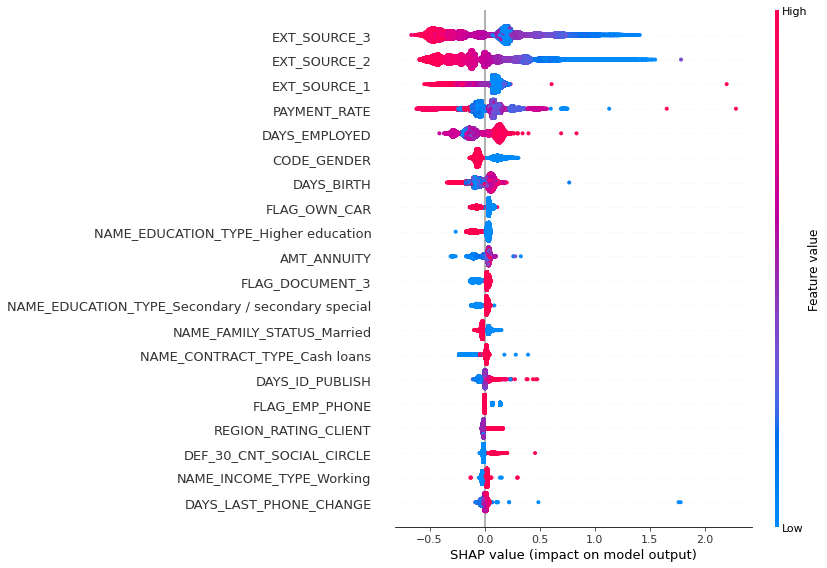

In [43]:
shap.initjs()
shap.summary_plot(shap_values, observations, feature_names = X_test.columns)

# LIME

In [44]:


#explainer = lime_tabular.LimeTabularExplainer(
#    training_data = np.array(X_train),
#    feature_names = X_train.columns,
#    class_names = [0, 1],
#    mode = 'classification'
#)
#classifier_gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier(verbose = True))
#Classifier_gbc_na , score  = fct_model.train_score_model(classifier_gbc ,X_train, y_train, X_test, y_test)

exp = fct_model.local_interpretability_lime(Classifier_gbc_na, X_train, X_test, 0)


X does not have valid feature names, but StandardScaler was fitted with feature names


In [45]:
X_train.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
96488             1             0                0             0   
196993            0             1                0             1   
155398            0             1                0             0   
218104            0             0                0             0   
207810            1             0                1             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
96488            67500.0    314100.0      13306.5                    0.028663   
196993          112500.0    247675.5      26136.0                    0.018850   
155398          180000.0    835380.0      42651.0                    0.018029   
218104          157500.0    529348.5      39708.0                    0.020713   
207810           90000.0    900000.0      24880.5                    0.010643   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
96488       -22074   -2384.142254            -2643.0            -4310   
196993      -18574   -6318.000000            -6443.0            -2102   
155398      -18578   -2601.000000            -3680.0            -2108   
218104      -20460   -1002.000000            -2001.0            -3899   
207810      -13734    -378.000000            -7855.0            -4038   

        OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
96488           0.0           1               0                0   
196993         12.0           1               1                0   
155398          2.0           1               1                0   
218104          0.0           1               1                0   
207810          0.0           1               1                0   

        FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
96488                  1           0           0              2.0   
196993                 1           0           1              3.0   
155398                 1           0           0              2.0   
218104                 1           0           0              2.0   
207810                 1           1           0              2.0   

        REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START  \
96488                      2                       14   
196993                     2                       12   
155398                     3                        9   
218104                     3                        6   
207810                     2                       15   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
96488                            0                           0   
196993                           0                           0   
155398                           0                           0   
218104                           0                           0   
207810                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
96488                             0                       0   
196993                            0                       0   
155398                            0                       0   
218104                            0                       0   
207810                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
96488                        0                        0      0.000000   
196993                       1                        1      0.812777   
155398                       0                        0      0.000000   
218104                       0                        0      0.000000   
207810                       0                        0      0.000000   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
96488       0.227658      0.339288          0.0000            0.0000   
196993      0.617263      0.758393          0.0000            0.0000   
155398      0.700521      0.000000          0.0000            0.0000   
218

In [46]:
#print(classifier_gbr.predict_proba(X_test))

In [47]:
#exp = explainer.explain_instance(
#""    data_row = X_test.iloc[0], 
#    predict_fn = classifier_gbr.predict_proba
#)

exp.show_in_notebook(show_table=True)

In [48]:
%matplotlib inline

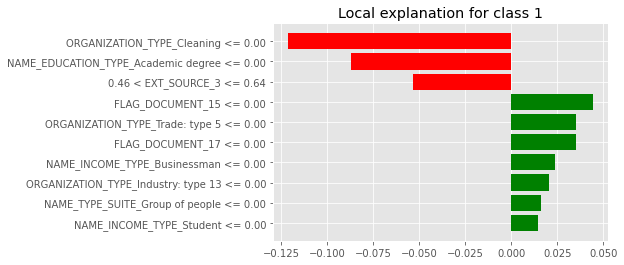

In [49]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.show()

In [50]:
print(exp.as_list())

[('ORGANIZATION_TYPE_Cleaning <= 0.00', -0.12127506596658755), ('NAME_EDUCATION_TYPE_Academic degree <= 0.00', -0.08735523982481855), ('0.46 < EXT_SOURCE_3 <= 0.64', -0.053651660132582955), ('FLAG_DOCUMENT_15 <= 0.00', 0.04429735382353175), ('ORGANIZATION_TYPE_Trade: type 5 <= 0.00', 0.03508151434361912), ('FLAG_DOCUMENT_17 <= 0.00', 0.035000962749295095), ('NAME_INCOME_TYPE_Businessman <= 0.00', 0.023639276354047636), ('ORGANIZATION_TYPE_Industry: type 13 <= 0.00', 0.020709367298060687), ('NAME_TYPE_SUITE_Group of people <= 0.00', 0.01598358498167193), ('NAME_INCOME_TYPE_Student <= 0.00', 0.014506984927623291)]


# Feature selection

In [51]:
#https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2



Scaler = StandardScaler()

X_train_ = Scaler.fit_transform(X_train)
X_test_ = Scaler.transform(X_test)

In [52]:
num_feats = 30
X_train_= pd.DataFrame(X_train_, columns = X_train.columns)
cor_support, cor_feature = fct_model.cor_selector(X_train_, y_train,num_feats) # correlation
chi_support, chi_feature = fct_model.chi_selector(X_train_, y_train,num_feats) #chi2
rfe_support, rfe_feature = fct_model.rfe_selector(X_train_, y_train,num_feats) # backwards logistic
embeded_lr_support, embeded_lr_feature = fct_model.embeded_selector(X_train_, y_train,num_feats, LogisticRegression(penalty="l1", solver = 'liblinear')) # Logitic penalty
embeded_rf_support, embeded_rf_feature = fct_model.embeded_selector(X_train_, y_train,num_feats, RandomForestClassifier(n_estimators=100, verbose = 5)) # Random Forest
embeded_gbc_support, embeded_gbc_feature = fct_model.embeded_selector(X_train_, y_train,num_feats, GradientBoostingClassifier(n_estimators=100, verbose = 5)) # Gradient Boosting


invalid value encountered in true_divide
invalid value encountered in true_divide


Fitting estimator with 210 features.
Fitting estimator with 180 features.
Fitting estimator with 150 features.
Fitting estimator with 120 features.
Fitting estimator with 90 features.
Fitting estimator with 60 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


      Iter       Train Loss   Remaining Time 
         1           0.5536            3.99m
         2           0.5479            4.12m
         3           0.5433            4.02m
         4           0.5396            4.08m
         5           0.5362            4.03m
         6           0.5336            3.97m
         7           0.5309            3.85m
         8           0.5287            3.79m
         9           0.5269            3.81m
        10           0.5247            3.83m
        11           0.5231            3.76m
        12           0.5218            3.71m
        13           0.5204            3.65m
        14           0.5193            3.59m
        15           0.5183            3.52m
        16           0.5168            3.47m
        17           0.5158            3.42m
        18           0.5149            3.42m
        19           0.5137            3.37m
        20           0.5127            3.33m
        21           0.5120            3.29m
        2

In [53]:
feature_name = X_train.columns
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'Gradient Boosting' : embeded_gbc_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(3*num_feats)

Feature  Pearson  Chi-2    RFE  \
1                                        EXT_SOURCE_3     True   True   True   
2                                        EXT_SOURCE_2     True   True   True   
3                                        EXT_SOURCE_1     True   True   True   
4                                          DAYS_BIRTH     True   True   True   
5   NAME_EDUCATION_TYPE_Secondary / secondary special     True   True   True   
..                                                ...      ...    ...    ...   
86                         REG_REGION_NOT_LIVE_REGION    False  False  False   
87                       ORGANIZATION_TYPE_University    False  False  False   
88                ORGANIZATION_TYPE_Transport: type 4    False  False  False   
89                ORGANIZATION_TYPE_Transport: type 3    False  False  False   
90                ORGANIZATION_TYPE_Transport: type 2    False  False  False   

    Logistics  Random Forest  Gradient Boosting  Total  
1        True           True               True      6  
2        True           True               True      6  
3        True           True               True      6  
4        True           True               True      6  
5        True          False               True      5  
..        ...            ...                ...    ...  
86      False          False              False      0  
87      False          False              False      0  
88      False          False              False      0  
89      False          False              False      0  
90      False          False              False      0  

[90 rows x 8 columns]

In [54]:
feat_importante = feature_selection_df.iloc[:3*num_feats]['Feature']
X_train_fs = X_train[feat_importante]
X_test_fs = X_test[feat_importante]
model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', verbose = True))
model.fit(X_train_fs, y_train)

print('perf logistique avec feature selecte : ', roc_auc_score(y_test, [i[1] for i in model.predict_proba(X_test_fs)]))

model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', verbose = True))
model.fit(X_train, y_train)

print('perf logistique avec all feature : ', roc_auc_score(y_test, [i[1] for i in model.predict_proba(X_test)]))

[LibLinear]perf logistique avec feature selecte :  0.7300248002991334
[LibLinear]perf logistique avec all feature :  0.731302940201958


In [55]:
feat_importante = feature_selection_df.iloc[:num_feats]['Feature']
X_train_fs = X_train[feat_importante]
X_test_fs = X_test[feat_importante]
model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', verbose = True))
model.fit(X_train_fs, y_train)

print('perf logistique avec feature selecte : ', roc_auc_score(y_test, [i[1] for i in model.predict_proba(X_test_fs)]))

[LibLinear]perf logistique avec feature selecte :  0.7259822882914171


In [56]:
feat_importante = feature_selection_df.iloc[:num_feats]['Feature']
X_train_fs = X_train[feat_importante]
X_test_fs = X_test[feat_importante]
model = make_pipeline(StandardScaler(), GradientBoostingClassifier( verbose = 10))
model.fit(X_train_fs, y_train)

print('perf gbc avec feature selecte : ', roc_auc_score(y_test, [i[1] for i in model.predict_proba(X_test_fs)]))

      Iter       Train Loss   Remaining Time 
         1           0.5536            1.59m
         2           0.5479            1.63m
         3           0.5433            1.60m
         4           0.5396            1.56m
         5           0.5362            1.54m
         6           0.5336            1.51m
         7           0.5309            1.50m
         8           0.5287            1.49m
         9           0.5269            1.47m
        10           0.5247            1.45m
        11           0.5231            1.43m
        12           0.5218            1.42m
        13           0.5204            1.40m
        14           0.5193            1.39m
        15           0.5183            1.37m
        16           0.5168            1.35m
        17           0.5158            1.33m
        18           0.5149            1.32m
        19           0.5137            1.30m
        20           0.5127            1.29m
        21           0.5119            1.27m
        2

In [186]:
feat_importante

1                                          EXT_SOURCE_3
2                                          EXT_SOURCE_2
3                                          EXT_SOURCE_1
4                                            DAYS_BIRTH
5     NAME_EDUCATION_TYPE_Secondary / secondary special
6                                       FLAG_DOCUMENT_3
7                                       DAYS_ID_PUBLISH
8                                         DAYS_EMPLOYED
9                                           CODE_GENDER
10                                 REGION_RATING_CLIENT
11                                         PAYMENT_RATE
12                             NAME_INCOME_TYPE_Working
13                                        FLOORSMAX_AVG
14                                          AMT_ANNUITY
15                          YEARS_BEGINEXPLUATATION_AVG
16                               REG_CITY_NOT_LIVE_CITY
17                                          OWN_CAR_AGE
18                 NAME_EDUCATION_TYPE_Higher ed

## Modele tuné avec GridSearch

In [86]:


feat_importante = feature_selection_df.iloc[:num_feats]['Feature']
X_train_fs = X_train[feat_importante].drop(['DAYS_LAST_PHONE_CHANGE'], axis =1) # Suppression de la variable DAYS_LAST_PHONE_CHANGE car il n'y a pas de causalité évidente avec la cible
X_test_fs = X_test[feat_importante].drop(['DAYS_LAST_PHONE_CHANGE'], axis =1)

In [88]:
X_train_fs.head()

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  DAYS_BIRTH  \
96488       0.339288      0.227658      0.000000      -22074   
196993      0.758393      0.617263      0.812777      -18574   
155398      0.000000      0.700521      0.000000      -18578   
218104      0.803885      0.372749      0.000000      -20460   
207810      0.083364      0.645494      0.000000      -13734   

        NAME_EDUCATION_TYPE_Secondary / secondary special  FLAG_DOCUMENT_3  \
96488                                                   1                0   
196993                                                  0                1   
155398                                                  1                1   
218104                                                  1                1   
207810                                                  0                1   

        DAYS_ID_PUBLISH  DAYS_EMPLOYED  CODE_GENDER  REGION_RATING_CLIENT  \
96488             -4310   -2384.142254            1                     2   
196993            -2102   -6318.000000            0                     2   
155398            -2108   -2601.000000            0                     3   
218104            -3899   -1002.000000            0                     3   
207810            -4038    -378.000000            1                     2   

        PAYMENT_RATE  NAME_INCOME_TYPE_Working  FLOORSMAX_AVG  AMT_ANNUITY  \
96488       0.042364                         0         0.0000      13306.5   
196993      0.105525                         0         0.0000      26136.0   
155398      0.051056                         0         0.0000      42651.0   
218104      0.075013                         1         0.1667      39708.0   
207810      0.027645                         1         0.1250      24880.5   

        YEARS_BEGINEXPLUATATION_AVG  REG_CITY_NOT_LIVE_CITY  OWN_CAR_AGE  \
96488                        0.0000                       0          0.0   
196993                       0.0000                       0         12.0   
155398                       0.0000                       0          2.0   
218104                       0.9816                       0          0.0   
207810                       0.9757                       0          0.0   

        NAME_EDUCATION_TYPE_Higher education  INCOME_PER_PERSON  FLAG_OWN_CAR  \
96488                                      0            33750.0             0   
196993                                     1            37500.0             1   
155398                                     0            90000.0             1   
218104                                     0            78750.0             0   
207810                                     1            45000.0             0   

        FLAG_DOCUMENT_6  DAYS_REGISTRATION  AMT_REQ_CREDIT_BUREAU_YEAR  \
96488                 1            -2643.0                         1.0   
196993                0            -6443.0                         3.0   
155398                0            -3680.0                         0.0   
218104                0            -2001.0                         6.0   
207810                0            -7855.0                         0.0   

        AMT_CREDIT  YEARS_BUILD_AVG  TOTALAREA_MODE  REG_CITY_NOT_WORK_CITY  \
96488     314100.0           0.0000          0.0000                       0   
196993    247675.5           0.0000          0.0000                       1   
155398    835380.0           0.0000          0.0000                       0   
218104    529348.5           0.7484          0.0728                       0   
207810    900000.0           0.6668          0.0431                       0   

        REGION_POPULATION_RELATIVE  OCCUPATION_TYPE_Laborers  
96488                     0.028663                         0  
196993                    0.018850                         0  
155398                    0.018029                         0  
218104                    0.020713                         1  
207810                    0.010643         

In [89]:
model = make_pipeline(StandardScaler(), GradientBoostingClassifier( verbose = 10))


param_grid_gbc = {
    'gradientboostingclassifier__learning_rate' : np.linspace(10**(-2), 1, 3),
    'gradientboostingclassifier__n_estimators' : [50, 100, 200],
    'gradientboostingclassifier__max_depth' : [3, 4]
}

model_tune = GridSearchCV(model, param_grid = param_grid_gbc, cv = 5, verbose = 10, n_jobs = -1, scoring = 'roc_auc')
model_tune.fit(X_train_fs, y_train)


print('perf gbc avec feature selecte : ', roc_auc_score(y_test, [i[1] for i in model_tune.predict_proba(X_test_fs)]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
      Iter       Train Loss   Remaining Time 
         1           0.5332            1.49m
         2           0.5241            1.48m
         3           0.5161            1.47m
         4           0.5118            1.48m
         5           0.5084            1.47m
         6           0.5058            1.45m
         7           0.5044            1.42m
         8           0.5028            1.40m
         9           0.5017            1.39m
        10           0.5001            1.38m
        11           0.4992            1.36m
        12           0.4983            1.34m
        13           0.4978            1.32m
        14           0.4970            1.30m
        15           0.4964            1.29m
        16           0.4958            1.28m
        17           0.4952            1.26m
        18           0.4946            1.24m
        19           0.4939            1.22m
        20           0.4936           

In [ ]:
# 52 min de temps d'entrainement pour la recherche

In [119]:
print(model_tune.best_params_)

{'gradientboostingclassifier__learning_rate': 0.505, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 100}


In [91]:
import pickle
with open('classifier.pkl', 'wb') as f:
    pickle.dump(model_tune, f)

In [60]:
pickle_in = open("classifier.pkl","rb")
model_tune = pickle.load(pickle_in)

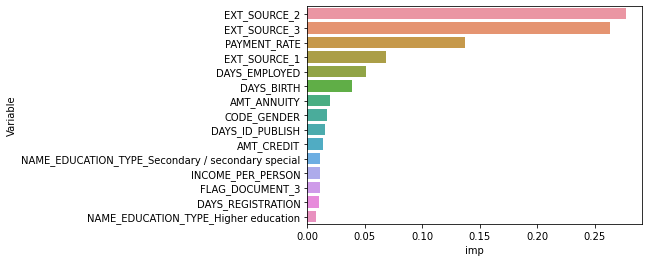

In [92]:
#fct_model.feature_importance_model(model_tune.best_estimator_, X_train)
Feat_imp = pd.DataFrame({})

Feat_imp['imp'] = np.abs(model_tune.best_estimator_[-1].feature_importances_)
Feat_imp['Variable'] = X_train_fs.columns
sns.barplot(data =  Feat_imp.sort_values(by = 'imp', ascending = False).iloc[:15], y = 'Variable', x = 'imp')
plt.show()


## Comportement du modéle tuné avec feature select

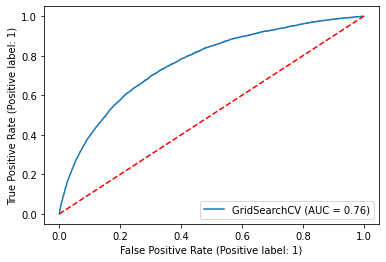

In [118]:
from sklearn.metrics import RocCurveDisplay
Display = RocCurveDisplay.from_estimator(model_tune, X_test_fs, y_test)
plt.plot([0,1],[0,1], 'r', linestyle='dashed')

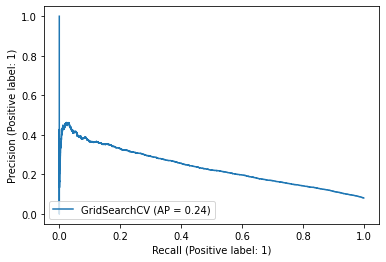

In [139]:
from sklearn.metrics import PrecisionRecallDisplay
Display = PrecisionRecallDisplay.from_estimator(model_tune, X_test_fs, y_test)

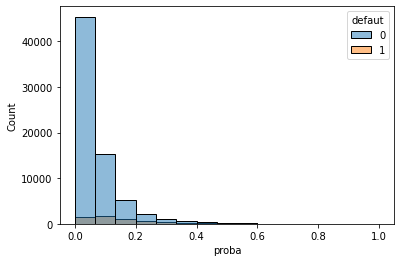

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
invalid value encountered in true_divide
invalid value encountered in true_divide
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed

########
-0.01  : Accepte :  0 
 Rejete : 76877
Tx de rejete:  1.0
Tx de defaut Accepte nan
Tx de defaut rejete 0.08072635508669693
########
0.06214285714275552  : Accepte :  44816 
 Rejete : 32061
Tx de rejete:  0.4170428086423768
Tx de defaut Accepte 0.03184130667618708
Tx de defaut rejete 0.1490596051277253
########
0.13428571428551103  : Accepte :  64235 
 Rejete : 12642
Tx de rejete:  0.16444450225685187
Tx de defaut Accepte 0.05124931890713785
Tx de defaut rejete 0.2305015029267521
########
0.20642857142826654  : Accepte :  70785 
 Rejete : 6092
Tx de rejete:  0.07924346683663515
Tx de defaut Accepte 0.062301335028607754
Tx de defaut rejete 0.2948128693368352
########
0.2785714285710221  : Accepte :  73711 
 Rejete : 3166
Tx de rejete:  0.04118266841838261
Tx de defaut Accepte 0.06954185942396657
Tx de defaut rejete 0.34112444725205304
########
0.3507142857137776  : Accepte :  75186 
 Rejete : 1691
Tx de rejete:  0.02199617570924984
Tx de defaut Accepte 0.0743090468970287
Tx de d

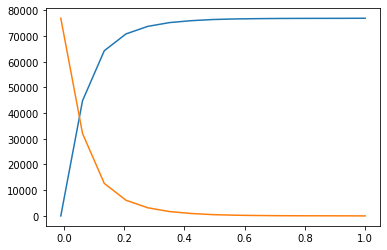

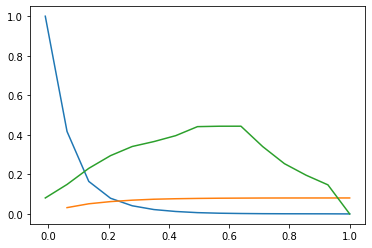

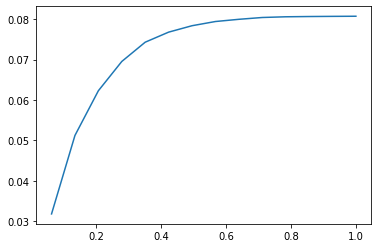

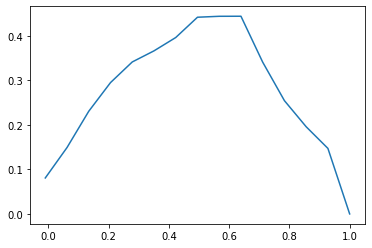

In [192]:
def impact_proba(clf, X_test, y_test):
    
    """
    Calcule les classements du modèle suivant le seuil de probabilite considere
    Nb de dossiers accepte
    Nb de dossiers rejete
    Tx de defaut accepte et rejete
    
    """
    defaut = pd.DataFrame({})
    defaut['defaut'] = y_test
    defaut['proba'] =[i[1] for i in clf.predict_proba(X_test)]

    sns.histplot(data= defaut, x= 'proba', hue = 'defaut', bins = 15)
    plt.show()
    
    
    seuils = np.linspace(-0.01, defaut['proba'].max(), 15)

    liste_accepte=[]
    liste_rejete=[]
    liste_tx_rejete=[]
    liste_tx_defaut_accepte=[]
    liste_tx_defaut_rejete = []

    for seuil in seuils:
        defaut[f'Dossiers_rejete_{round(seuil, 3)}'] = np.where(defaut['proba'] < seuil, 0, 1)
        Nb_dossiers = defaut[f'Dossiers_rejete_{round(seuil, 3)}'].count()
        Nb_dossiers_rejete = defaut[f'Dossiers_rejete_{round(seuil, 3)}'].sum()
        Nb_dossiers_accepte = Nb_dossiers - Nb_dossiers_rejete
        Nb_dossiers_defaut_accepte = defaut[defaut['defaut'] == 1][ defaut[f'Dossiers_rejete_{round(seuil, 3)}'] ==0][f'Dossiers_rejete_{round(seuil, 3)}'].count()
        Nb_dossiers_defaut_rejete = defaut[defaut['defaut'] == 1][defaut[f'Dossiers_rejete_{round(seuil, 3)}'] ==1][f'Dossiers_rejete_{round(seuil, 3)}'].count()

        liste_accepte.append(Nb_dossiers_accepte)
        liste_rejete.append(Nb_dossiers_rejete)
        liste_tx_rejete.append( Nb_dossiers_rejete / Nb_dossiers)
        liste_tx_defaut_accepte.append(Nb_dossiers_defaut_accepte / (Nb_dossiers_accepte))
        liste_tx_defaut_rejete.append(Nb_dossiers_defaut_rejete/ Nb_dossiers_rejete)
        print('########')
        print(seuil, ' : Accepte : ',Nb_dossiers_accepte ,
              '\n Rejete :', Nb_dossiers_rejete)
        print('Tx de rejete: ', Nb_dossiers_rejete / Nb_dossiers)
        print('Tx de defaut Accepte',
              Nb_dossiers_defaut_accepte / (Nb_dossiers_accepte))
        print('Tx de defaut rejete', Nb_dossiers_defaut_rejete/ Nb_dossiers_rejete)
   
    plt.plot(seuils, liste_accepte)
    plt.plot(seuils, liste_rejete)
    plt.show()
    plt.plot(seuils, liste_tx_rejete)
    plt.plot(seuils, liste_tx_defaut_accepte)
    plt.plot(seuils, liste_tx_defaut_rejete)
    plt.show()
    
    plt.plot(seuils, liste_tx_defaut_accepte)
    plt.show()
    
    plt.plot(seuils, liste_tx_defaut_rejete)
    plt.show()
    
    
    return pd.DataFrame({'Seuils_proba' : seuils, 
                        'Nbres_accepte' : liste_accepte,
                        'Nbres_rejete' :liste_rejete,
                         'Tx_rejete' : liste_tx_rejete,
                        'Tx_defaut_accepte' : liste_tx_defaut_accepte,
                        'Tx_defaut_rejete' : liste_tx_defaut_rejete,
                        })


Impact_seuils = impact_proba(model_tune, X_test_fs, y_test)

In [196]:
Impact_seuils.to_csv(path_or_buf = 'Impact_proba.csv')
Impact_seuils

Seuils_proba  Nbres_accepte  Nbres_rejete  Tx_rejete  Tx_defaut_accepte  \
0      -0.010000              0         76877   1.000000                NaN   
1       0.062143          44816         32061   0.417043           0.031841   
2       0.134286          64235         12642   0.164445           0.051249   
3       0.206429          70785          6092   0.079243           0.062301   
4       0.278571          73711          3166   0.041183           0.069542   
5       0.350714          75186          1691   0.021996           0.074309   
6       0.422857          75930           947   0.012318           0.076794   
7       0.495000          76381           496   0.006452           0.078383   
8       0.567143          76602           275   0.003577           0.079424   
9       0.639286          76717           160   0.002081           0.079969   
10      0.711429          76786            91   0.001184           0.080418   
11      0.783571          76818            59   0.000767           0.080593   
12      0.855714          76831            46   0.000598           0.080658   
13      0.927857          76843            34   0.000442           0.080697   
14      1.000000          76876             1   0.000013           0.080727   

    Tx_defaut_rejete  
0           0.080726  
1           0.149060  
2           0.230502  
3           0.294813  
4           0.341124  
5           0.366056  
6           0.395987  
7           0.441532  
8           0.443636  
9           0.443750  
10          0.340659  
11          0.254237  
12          0.195652  
13          0.147059  
14          0.000000

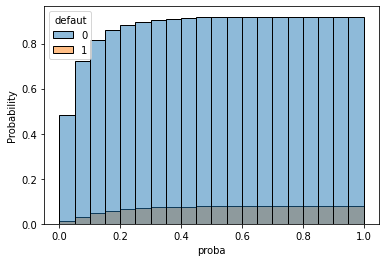

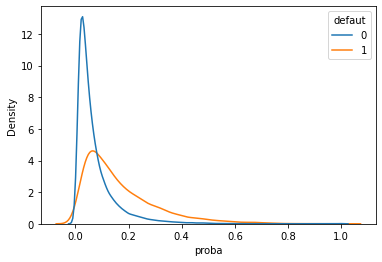

<AxesSubplot:xlabel='proba'>

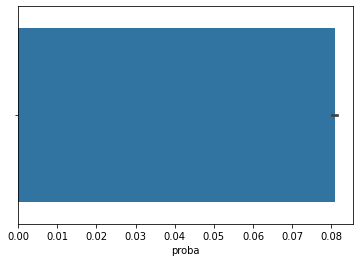

In [150]:
defaut = pd.DataFrame({})
defaut['defaut'] = y_test
defaut['proba'] =[i[1] for i in model_tune.predict_proba(X_test_fs)]

sns.histplot(data= defaut, x= 'proba', hue = 'defaut', bins  = 20, stat = 'probability', cumulative = True)

plt.show()

sns.kdeplot(data= defaut, x= 'proba', hue = 'defaut', common_norm = False)
plt.show()

sns.barplot(data= defaut, x= 'proba', hue = 'defaut', dodge = False)

In [95]:
seuils = np.linspace(-0.01, defaut['proba'].max(), 30)

liste_accepte=[]
liste_rejete=[]
liste_tx_rejete=[]
liste_tx_defaut_accepte=[]
liste_tx_defaut_rejete = []



for seuil in seuils:
    defaut[f'Dossiers_rejete_{round(seuil, 3)}'] = np.where(
        defaut['proba'] < seuil, 0, 1)
    Nb_dossiers = defaut[f'Dossiers_rejete_{round(seuil, 3)}'].count()
    Nb_dossiers_rejete = defaut[f'Dossiers_rejete_{round(seuil, 3)}'].sum()
    Nb_dossiers_accepte = Nb_dossiers - Nb_dossiers_rejete
    Nb_dossiers_defaut_accepte = defaut[defaut['defaut'] == 1][
        defaut[f'Dossiers_rejete_{round(seuil, 3)}'] ==
        0][f'Dossiers_rejete_{round(seuil, 3)}'].count()
    Nb_dossiers_defaut_rejete = defaut[defaut['defaut'] == 1][
        defaut[f'Dossiers_rejete_{round(seuil, 3)}'] ==
        1][f'Dossiers_rejete_{round(seuil, 3)}'].count()
    
    liste_accepte.append(Nb_dossiers_accepte)
    liste_rejete.append(Nb_dossiers_rejete)
    liste_tx_rejete.append( Nb_dossiers_rejete / Nb_dossiers)
    liste_tx_defaut_accepte.append(Nb_dossiers_defaut_accepte / (Nb_dossiers_accepte))
    liste_tx_defaut_rejete.append(Nb_dossiers_defaut_rejete/ Nb_dossiers_rejete)
    print('########')
    print(seuil, ' : Accepte : ',Nb_dossiers_accepte ,
          '\n Rejete :', Nb_dossiers_rejete)
    print('Tx de rejete: ', Nb_dossiers_rejete / Nb_dossiers)
    print('Tx de defaut Accepte',
          Nb_dossiers_defaut_accepte / (Nb_dossiers_accepte))
    print('Tx de defaut rejete', Nb_dossiers_defaut_rejete/ Nb_dossiers_rejete)

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
invalid value encountered in true_divide
invalid value encountered in true_divide
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed

########
-0.01  : Accepte :  0 
 Rejete : 76877
Tx de rejete:  1.0
Tx de defaut Accepte nan
Tx de defaut rejete 0.08072635508669693
########
0.024827586206847496  : Accepte :  16923 
 Rejete : 59954
Tx de rejete:  0.7798691416158279
Tx de defaut Accepte 0.01808190037227442
Tx de defaut rejete 0.09840878006471629
########
0.059655172413694994  : Accepte :  43559 
 Rejete : 33318
Tx de rejete:  0.43339360276805805
Tx de defaut Accepte 0.030556257030694003
Tx de defaut rejete 0.14631730596074194
########
0.09448275862054249  : Accepte :  56494 
 Rejete : 20383
Tx de rejete:  0.2651378175527141
Tx de defaut Accepte 0.04143802881721953
Tx de defaut rejete 0.1896187999803758
########
0.12931034482738998  : Accepte :  63520 
 Rejete : 13357
Tx de rejete:  0.17374507329890604
Tx de defaut Accepte 0.050188916876574306
Tx de defaut rejete 0.22594894063038107
########
0.1641379310342375  : Accepte :  67699 
 Rejete : 9178
Tx de rejete:  0.11938551192164107
Tx de defaut Accepte 0.05626375574233002

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

########
0.5820689655164074  : Accepte :  76634 
 Rejete : 243
Tx de rejete:  0.003160893375131704
Tx de defaut Accepte 0.07958608450557193
Tx de defaut rejete 0.4403292181069959
########
0.616896551723255  : Accepte :  76691 
 Rejete : 186
Tx de rejete:  0.0024194492501008105
Tx de defaut Accepte 0.07987899492769686
Tx de defaut rejete 0.43010752688172044
########
0.6517241379301024  : Accepte :  76732 
 Rejete : 145
Tx de rejete:  0.0018861297917452554
Tx de defaut Accepte 0.08007089610592712
Tx de defaut rejete 0.42758620689655175
########
0.68655172413695  : Accepte :  76768 
 Rejete : 109
Tx de rejete:  0.0014178492917257437
Tx de defaut Accepte 0.08031992496873698
Tx de defaut rejete 0.3669724770642202
########
0.7213793103437974  : Accepte :  76791 
 Rejete : 86
Tx de rejete:  0.0011186700833799447
Tx de defaut Accepte 0.08043911395866703
Tx de defaut rejete 0.3372093023255814
########
0.756206896550645  : Accepte :  76809 
 Rejete : 68
Tx de rejete:  0.0008845298333701887
Tx de

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


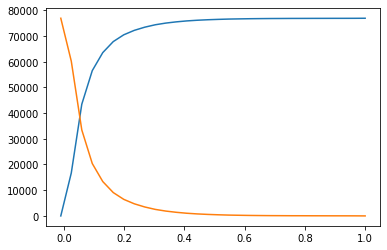

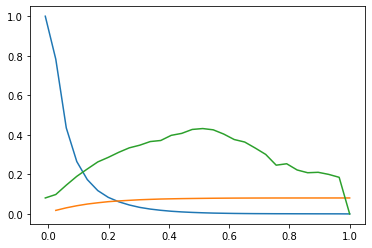

In [65]:
plt.plot(seuils, liste_accepte)
plt.plot(seuils, liste_rejete)
plt.show()
plt.plot(seuils, liste_tx_rejete)
plt.plot(seuils, liste_tx_defaut_accepte)
plt.plot(seuils, liste_tx_defaut_rejete)
plt.show()

In [66]:
defaut

defaut     proba  Dossiers_rejete_-0.01  Dossiers_rejete_0.025  \
248727       0  0.005349                      1                      0   
263686       0  0.085014                      1                      1   
264746       0  0.053044                      1                      1   
139119       0  0.030977                      1                      1   
23810        0  0.089434                      1                      1   
...        ...       ...                    ...                    ...   
95738        0  0.151905                      1                      1   
61549        0  0.075322                      1                      1   
55473        0  0.129850                      1                      1   
32719        0  0.071859                      1                      1   
52089        0  0.012088                      1                      0   

        Dossiers_rejete_0.06  Dossiers_rejete_0.094  Dossiers_rejete_0.129  \
248727                     0                      0                      0   
263686                     1                      0                      0   
264746                     0                      0                      0   
139119                     0                      0                      0   
23810                      1                      0                      0   
...                      ...                    ...                    ...   
95738                      1                      1                      1   
61549                      1                      0                      0   
55473                      1                      1                      1   
32719                      1                      0                      0   
52089                      0                      0                      0   

        Dossiers_rejete_0.164  Dossiers_rejete_0.199  Dossiers_rejete_0.234  \
248727                      0                      0                      0   
263686                      0                      0                      0   
264746                      0                      0                      0   
139119                      0                      0                      0   
23810                       0                      0                      0   
...                       ...                    ...                    ...   
95738                       0                      0                      0   
61549                       0                      0                      0   
55473                       0                      0                      0   
32719                       0                      0                      0   
52089                       0                      0                      0   

        Dossiers_rejete_0.269  Dossiers_rejete_0.303  Dossiers_rejete_0.338  \
248727                      0                      0                      0   
263686                      0                      0                      0   
264746                      0                      0                      0   
139119                      0                      0                      0   
23810                       0                      0                      0   
...                       ...                    ...                    ...   
95738                       0                      0                      0   
61549                       0                      0                      0   
55473                       0                      0                      0   
32719                       0                      0                      0   
52089                       0                      0                      0   

        Dossiers_rejete_0.373  Dossiers_rejete_0.408  Dossiers_rejete_0.443  \
248727                      0                      0                      0   
263686                      0                      0                      0   
264746                      0                  

### SHAP values model tuné

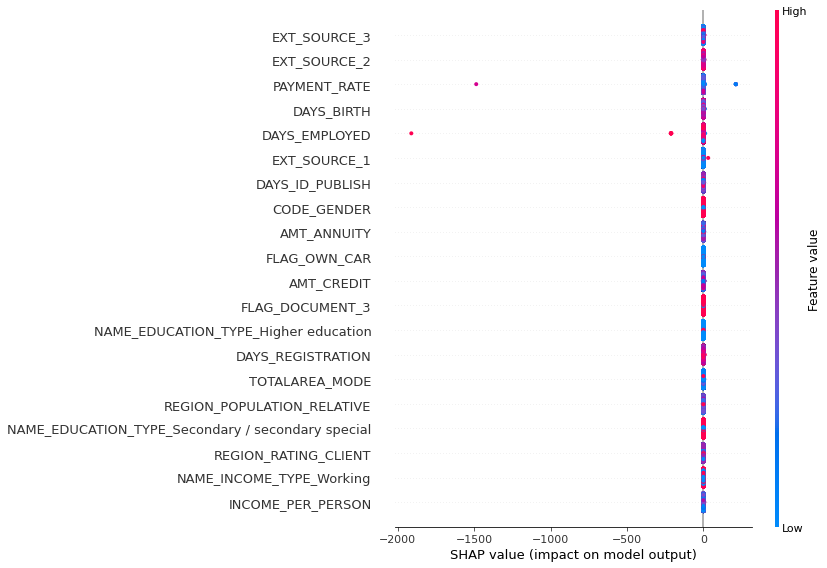

In [105]:
def local_interpretability_shap(clf, X_test):
    
    """
    Renvoi les valeurs de shap pour le modèle par rapport aux données de test 
    Valable uniquement pour les modèles d'arbres
    """
    pred = clf.predict(X_test)
    explainer = shap.TreeExplainer(clf[-1])
    observations = clf[0].transform(X_test)
    shap_values = explainer.shap_values(observations)
    return shap_values, observations
    

    
    
shap_values, observations = local_interpretability_shap(model_tune.best_estimator_, X_test_fs)

shap.initjs()
shap.summary_plot(shap_values, observations, feature_names = X_test_fs.columns)

### Lime values model tuné

In [120]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train_fs),
    feature_names = X_train_fs.columns,
    class_names = [0, 1],
    mode = 'classification'
)

In [68]:
print(model_tune.predict_proba(X_test_fs))

[[0.99465059 0.00534941]
 [0.91498589 0.08501411]
 [0.94695615 0.05304385]
 ...
 [0.87014979 0.12985021]
 [0.92814128 0.07185872]
 [0.98791227 0.01208773]]


In [197]:
exp = explainer.explain_instance(
    data_row = X_test_fs.iloc[13], 
    predict_fn = model_tune.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but StandardScaler was fitted with feature names


In [70]:
%matplotlib inline

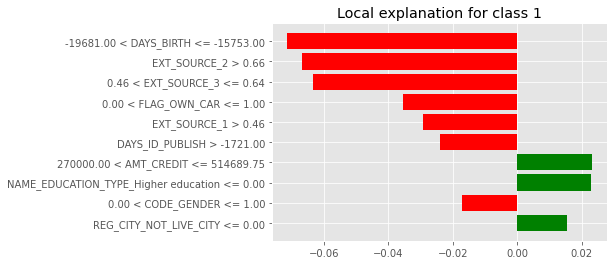

In [122]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.show()

In [72]:
print(exp.as_list())

[('0.46 < EXT_SOURCE_3 <= 0.64', -0.06747291854091701), ('EXT_SOURCE_2 > 0.66', -0.05585363415615727), ('16551.00 < AMT_ANNUITY <= 24916.50', -0.05483513071033423), ('EXT_SOURCE_1 > 0.46', -0.03868035583295737), ('0.05 < PAYMENT_RATE <= 0.06', -0.03582537173293813), ('270000.00 < AMT_CREDIT <= 514689.75', 0.03563162923558293), ('0.00 < CODE_GENDER <= 1.00', -0.03085808017302129), ('-7486.00 < DAYS_REGISTRATION <= -4504.00', -0.024664161324575686), ('0.00 < NAME_EDUCATION_TYPE_Secondary / secondary special <= 1.00', 0.020509752410758707), ('OWN_CAR_AGE > 5.00', 0.016074701445727018)]


<AxesSubplot:>

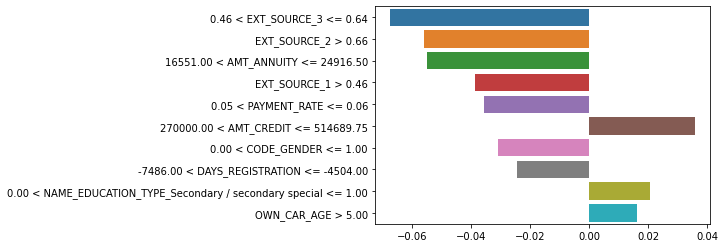

In [73]:
sns.barplot([i[1] for i in exp.as_list()], [i[0] for i in exp.as_list()])

# Essai de SMOTE sur le modèle avec moins de variable

In [74]:
X_resampled_fs, y_resampled_fs = SMOTE(random_state = 0).fit_resample(X_train_fs, y_train)

print(X_resampled_fs.shape)
model = GradientBoostingClassifier(n_estimators = 200,  verbose = 10)
model.fit(X_resampled_fs,y_resampled_fs)

(424022, 30)
      Iter       Train Loss   Remaining Time 
         1           1.3291           11.18m
         2           1.2867           10.54m
         3           1.2294           10.34m
         4           1.1964           10.12m
         5           1.1498           10.04m
         6           1.1214            9.95m
         7           1.0829            9.86m
         8           1.0473            9.90m
         9           1.0243            9.86m
        10           0.9952            9.86m
        11           0.9767            9.86m
        12           0.9551            9.78m
        13           0.9347            9.77m
        14           0.9079            9.74m
        15           0.8937            9.72m
        16           0.8782            9.70m
        17           0.8671            9.63m
        18           0.8433            9.54m
        19           0.8267            9.47m
        20           0.8101            9.38m
        21           0.7990            9.

GradientBoostingClassifier(n_estimators=200, verbose=10)

In [75]:
roc_auc_score(y_test, [i[1] for i in model.predict_proba(X_test_fs)])

0.7267669118131941

Au vu de la perte de performance observé suite à l'ajout des données SMOTE, cette méthode ne sera pas conservée pour le modèle final

In [76]:
Feat_imp = pd.DataFrame({})

Feat_imp['imp'] = np.abs(model.feature_importances_)
Feat_imp['Variable'] = X_train_fs.columns
print(Feat_imp.sort_values(by = 'imp', ascending = False).iloc[:40])

         imp                                           Variable
14  0.218369                        YEARS_BEGINEXPLUATATION_AVG
23  0.135021                         AMT_REQ_CREDIT_BUREAU_YEAR
0   0.112711                                       EXT_SOURCE_3
16  0.088740                                        OWN_CAR_AGE
19  0.078554                                       FLAG_OWN_CAR
8   0.071071                                        CODE_GENDER
1   0.060202                                       EXT_SOURCE_2
17  0.057735               NAME_EDUCATION_TYPE_Higher education
4   0.051052  NAME_EDUCATION_TYPE_Secondary / secondary special
2   0.032802                                       EXT_SOURCE_1
12  0.017235                                      FLOORSMAX_AVG
7   0.012869                                      DAYS_EMPLOYED
25  0.011378                                    YEARS_BUILD_AVG
28  0.008843                         REGION_POPULATION_RELATIVE
22  0.008626                            

## Comportement SMOTE + feat_select

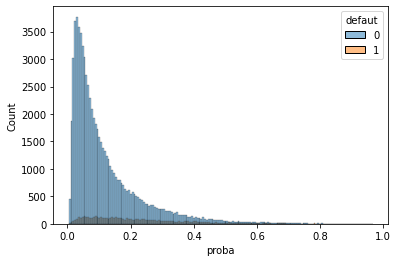

In [77]:
defaut = pd.DataFrame({})
defaut['defaut'] = y_test
defaut['proba'] =[i[1] for i in model.predict_proba(X_test_fs)]

sns.histplot(data= defaut, x= 'proba', hue = 'defaut')
plt.show()

In [78]:
seuils = np.linspace(-0.01, defaut['proba'].max(), 30)

liste_accepte=[]
liste_rejete=[]
liste_tx_rejete=[]
liste_tx_defaut_accepte=[]
liste_tx_defaut_rejete = []



for seuil in seuils:
    defaut[f'Dossiers_rejete_{round(seuil, 3)}'] = np.where(
        defaut['proba'] < seuil, 0, 1)
    Nb_dossiers = defaut[f'Dossiers_rejete_{round(seuil, 3)}'].count()
    Nb_dossiers_rejete = defaut[f'Dossiers_rejete_{round(seuil, 3)}'].sum()
    Nb_dossiers_accepte = Nb_dossiers - Nb_dossiers_rejete
    Nb_dossiers_defaut_accepte = defaut[defaut['defaut'] == 1][
        defaut[f'Dossiers_rejete_{round(seuil, 3)}'] ==
        0][f'Dossiers_rejete_{round(seuil, 3)}'].count()
    Nb_dossiers_defaut_rejete = defaut[defaut['defaut'] == 1][
        defaut[f'Dossiers_rejete_{round(seuil, 3)}'] ==
        1][f'Dossiers_rejete_{round(seuil, 3)}'].count()
    
    liste_accepte.append(Nb_dossiers_accepte)
    liste_rejete.append(Nb_dossiers_rejete)
    liste_tx_rejete.append( Nb_dossiers_rejete / Nb_dossiers)
    liste_tx_defaut_accepte.append(Nb_dossiers_defaut_accepte / (Nb_dossiers_accepte))
    liste_tx_defaut_rejete.append(Nb_dossiers_defaut_rejete/ Nb_dossiers_rejete)
    print('########')
    print(seuil, ' : Accepte : ',Nb_dossiers_accepte ,
          '\n Rejete :', Nb_dossiers_rejete)
    print('Tx de rejete: ', Nb_dossiers_rejete / Nb_dossiers)
    print('Tx de defaut Accepte',
          Nb_dossiers_defaut_accepte / (Nb_dossiers_accepte))
    print('Tx de defaut rejete', Nb_dossiers_defaut_rejete/ Nb_dossiers_rejete)

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
invalid value encountered in true_divide
invalid value encountered in true_divide
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed

########
-0.01  : Accepte :  0 
 Rejete : 76877
Tx de rejete:  1.0
Tx de defaut Accepte nan
Tx de defaut rejete 0.08072635508669693
########
0.02370627565955912  : Accepte :  6731 
 Rejete : 70146
Tx de rejete:  0.9124445542880185
Tx de defaut Accepte 0.015005199821720399
Tx de defaut rejete 0.0870327602429219
########
0.057412551319118245  : Accepte :  27142 
 Rejete : 49735
Tx de rejete:  0.6469425185686226
Tx de defaut Accepte 0.027116645788814384
Tx de defaut rejete 0.10998290941992561
########
0.09111882697867738  : Accepte :  40585 
 Rejete : 36292
Tx de rejete:  0.4720787751863366
Tx de defaut Accepte 0.035259332265615374
Tx de defaut rejete 0.13157169624159595
########
0.1248251026382365  : Accepte :  49742 
 Rejete : 27135
Tx de rejete:  0.3529664268897069
Tx de defaut Accepte 0.04165493948775682
Tx de defaut rejete 0.1523493642896628
########
0.15853137829779562  : Accepte :  56085 
 Rejete : 20792
Tx de rejete:  0.27045800434460243
Tx de defaut Accepte 0.04771329232415084
Tx

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

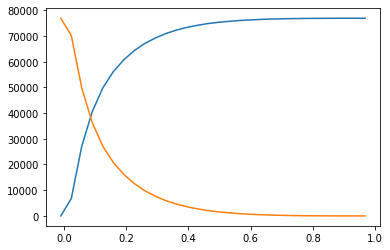

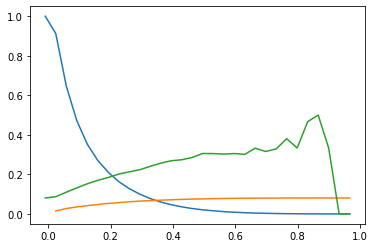

In [79]:
plt.plot(seuils, liste_accepte)
plt.plot(seuils, liste_rejete)
plt.show()
plt.plot(seuils, liste_tx_rejete)
plt.plot(seuils, liste_tx_defaut_accepte)
plt.plot(seuils, liste_tx_defaut_rejete)
plt.show()

In [80]:
index = 5 

ind_test = X_test_fs.iloc[index: index+1]
print(model.predict_proba(ind_test)[0][1])

0.029922234704277215


# Sauvegarde model et Jeu de données

In [165]:
import pickle

# Sauvegarde du jeu de Test
X_test_fs_id_cli = pd.concat([X_test_fs, app_train.iloc[test_index][['SK_ID_CURR']], y_test], axis = 1)
with open('data_test.pkl', 'wb') as f:
    pickle.dump(X_test_fs_id_cli, f)

# Sauvegarde du jeu d'entrainement
X_train_fs_id_cli = pd.concat([X_train_fs, app_train.iloc[train_index][['SK_ID_CURR']], y_train], axis = 1)
with open('data_train.pkl', 'wb') as f:
    pickle.dump(X_train_fs_id_cli, f)
    
# Suavegarde du modèle entrainé    
with open('classifier.pkl', 'wb') as f:
    pickle.dump(model_tune, f)
    
